In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings


In [429]:
df= pd.read_csv(r"C:\Users\B-HONEST\OneDrive\Desktop\GO MINDZ\marriages-civil-unions-and-divorces-year-ended-december-2020-csv\MCUD-dec20-marriage-rate-and-divorce-rate.csv")

In [430]:
df.head()

,Period,General Marriage_Rate_and Divorce_Rate,Count
0,2005,Marriage Rate,13.76
1,2006,Marriage Rate,14.17
2,2007,Marriage Rate,13.98
3,2008,Marriage Rate,14.11
4,2009,Marriage Rate,13.70


## CLEANING THE DATA

In [431]:
columns = ["Period", "General Marriage_Rate_and Divorce_Rate", "Count"]

In [432]:
df = df.dropna(subset = columns)

In [433]:
df

,Period,General Marriage_Rate_and Divorce_Rate,Count
0,2005,Marriage Rate,13.76
1,2006,Marriage Rate,14.17
2,2007,Marriage Rate,13.98
3,2008,Marriage Rate,14.11
4,2009,Marriage Rate,13.70
5,2010,Marriage Rate,13.04
6,2011,Marriage Rate,12.46
7,2012,Marriage Rate,12.51
8,2013,Marriage Rate,11.44
9,2014,Marriage Rate,11.56


### SHOWING THE CORRELATION OF THE DF

In [434]:
df.corr().style.background_gradient(cmap='coolwarm')

C:\Users\B-HONEST\AppData\Local\Temp\ipykernel_11716\543879950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,Period,Count
Period,1.000000,-0.756854
Count,-0.756854,1.000000


### DISPLAYING PAIRPLOTS OF THE DF PATTERN

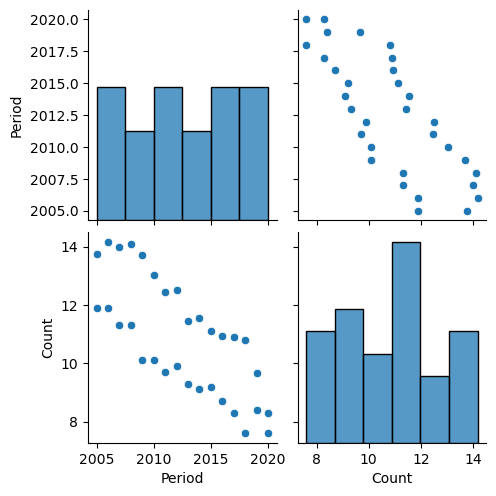

In [435]:
sns.pairplot(df)

### DISPLAYING SCATTTER PLOT

<Axes: >

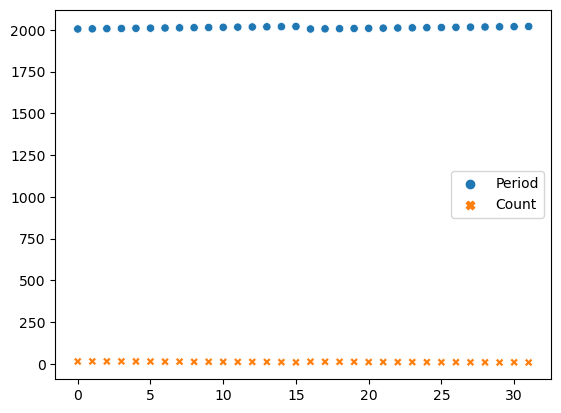

In [436]:
sns.scatterplot(df)

### DISPLAYING DISPLOT OFTHE DF

### DISPLAYING THE HEATMAP O THE DF

C:\Users\B-HONEST\AppData\Local\Temp\ipykernel_11716\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

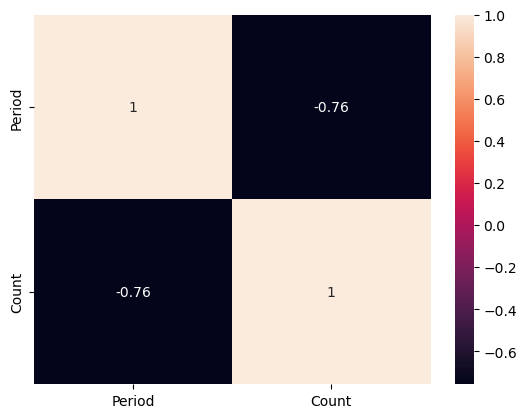

In [438]:
sns.heatmap(df.corr(), annot=True)

### DISPLAYING BOXPLOT

<Axes: >

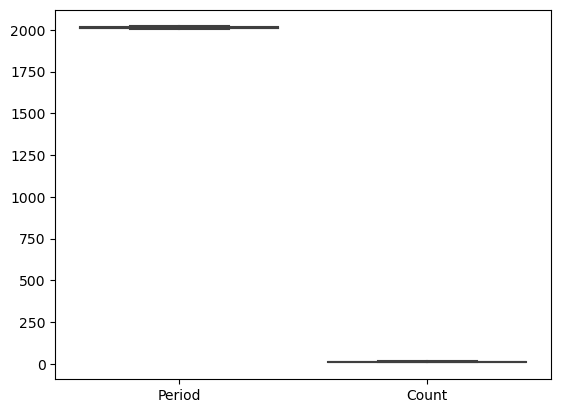

In [439]:
sns.boxplot(df)

## NO MISSING DATA FOUND

In [440]:
df.isnull()

,Period,General Marriage_Rate_and Divorce_Rate,Count
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


<Axes: >

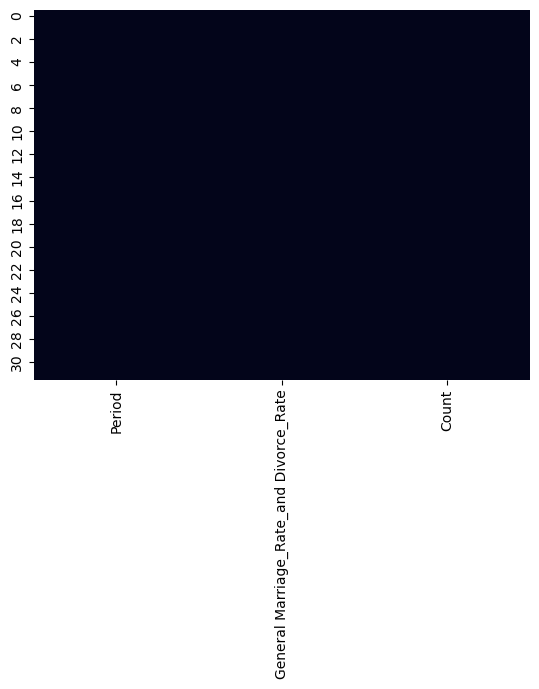

In [515]:
sns.heatmap(df.isnull(), cbar=False)

In [441]:
df.isnull().sum()*100 / len(df)

Period                                    0.0
General Marriage_Rate_and Divorce_Rate    0.0
Count                                     0.0
dtype: float64

In [442]:
df["General Marriage_Rate_and Divorce_Rate"].mode()[0]

'Divorce Rate'

## CHECKING FOR THE UNIQUE VALUES PRESENT IN THIS COLUMN

In [443]:
df["General Marriage_Rate_and Divorce_Rate"].unique()

array(['Marriage Rate', 'Divorce Rate'], dtype=object)

## SHOWING THE LAS PART OF THE DATA

In [444]:
df.tail

<bound method NDFrame.tail of     Period General Marriage_Rate_and Divorce_Rate  Count
0     2005                          Marriage Rate  13.76
1     2006                          Marriage Rate  14.17
2     2007                          Marriage Rate  13.98
3     2008                          Marriage Rate  14.11
4     2009                          Marriage Rate  13.70
5     2010                          Marriage Rate  13.04
6     2011                          Marriage Rate  12.46
7     2012                          Marriage Rate  12.51
8     2013                          Marriage Rate  11.44
9     2014                          Marriage Rate  11.56
10    2015                          Marriage Rate  11.12
11    2016                          Marriage Rate  10.94
12    2017                          Marriage Rate  10.90
13    2018                          Marriage Rate  10.81
14    2019                          Marriage Rate   9.66
15    2020                          Marriage Rate   8.30
1

In [445]:
df["General Marriage_Rate_and Divorce_Rate"] = df["General Marriage_Rate_and Divorce_Rate"].replace(to_replace ="Marriage Rate", value= 0)

In [446]:
df["General Marriage_Rate_and Divorce_Rate"] = df["General Marriage_Rate_and Divorce_Rate"].replace(to_replace = "Divorce Rate", value = 1)

In [447]:
df

,Period,General Marriage_Rate_and Divorce_Rate,Count
0,2005,0,13.76
1,2006,0,14.17
2,2007,0,13.98
3,2008,0,14.11
4,2009,0,13.70
5,2010,0,13.04
6,2011,0,12.46
7,2012,0,12.51
8,2013,0,11.44
9,2014,0,11.56


### STORE FEAUTURE MATRI IN X AND TARGET RESPONSE IN VECTOR X

In [448]:
x = df.drop("General Marriage_Rate_and Divorce_Rate", axis = 1)


In [449]:
x

,Period,Count
0,2005,13.76
1,2006,14.17
2,2007,13.98
3,2008,14.11
4,2009,13.70
5,2010,13.04
6,2011,12.46
7,2012,12.51
8,2013,11.44
9,2014,11.56


In [450]:
y = df["General Marriage_Rate_and Divorce_Rate"]

In [451]:
y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: General Marriage_Rate_and Divorce_Rate, dtype: int64

<Axes: xlabel='General Marriage_Rate_and Divorce_Rate', ylabel='count'>

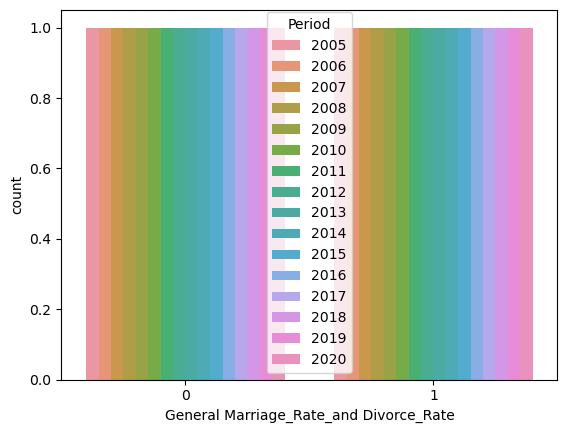

In [504]:
sns.countplot(x="General Marriage_Rate_and Divorce_Rate", hue= "Period", data=df)


(array([2., 4., 3., 5., 1., 6., 3., 2., 1., 5.]),
 array([ 7.6  ,  8.257,  8.914,  9.571, 10.228, 10.885, 11.542, 12.199,
        12.856, 13.513, 14.17 ]),
 <BarContainer object of 10 artists>)

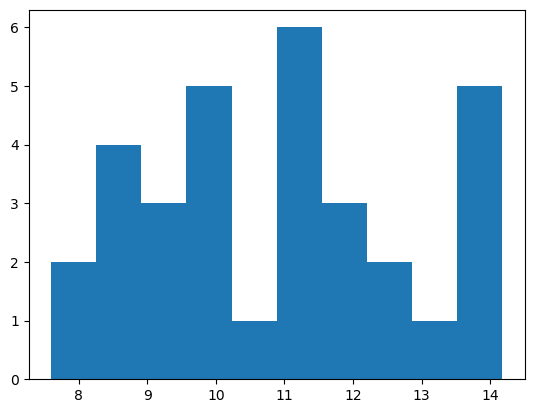

In [513]:
plt.hist(df["Count"].dropna())

(array([4., 2., 4., 2., 4., 2., 4., 2., 4., 4.]),
 array([2005. , 2006.5, 2008. , 2009.5, 2011. , 2012.5, 2014. , 2015.5,
        2017. , 2018.5, 2020. ]),
 <BarContainer object of 10 artists>)

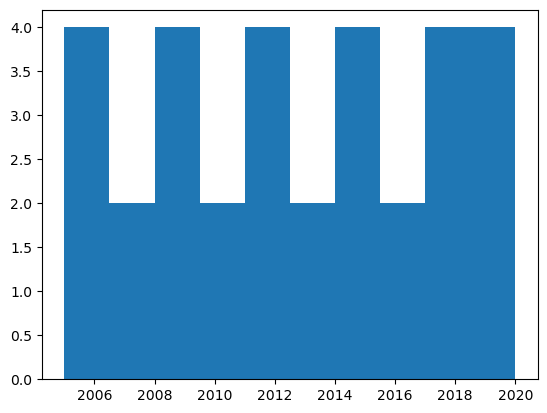

In [514]:
plt.hist(df["Period"].dropna())

### FEARURE SCALING

This is  essential to enable in the calculation of value range. looking at the unique values in columns, some  have short value range and while others are long.

In [452]:
df

,Period,General Marriage_Rate_and Divorce_Rate,Count
0,2005,0,13.76
1,2006,0,14.17
2,2007,0,13.98
3,2008,0,14.11
4,2009,0,13.70
5,2010,0,13.04
6,2011,0,12.46
7,2012,0,12.51
8,2013,0,11.44
9,2014,0,11.56


In [453]:
cols = ["Period", "Count"]

In [454]:
st = StandardScaler()

In [455]:
x[cols] = st.fit_transform(x[cols])

In [456]:
x

,Period,Count
0,-1.626978,1.511776
1,-1.410048,1.724001
2,-1.193118,1.625653
3,-0.976187,1.692944
4,-0.759257,1.480719
5,-0.542326,1.139089
6,-0.325396,0.838869
7,-0.108465,0.864750
8,0.108465,0.310896
9,0.325396,0.373011


### TRAINING THE DATASET

In [457]:
x = df
y = df ["General Marriage_Rate_and Divorce_Rate"]
y.unique

<bound method Series.unique of 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
Name: General Marriage_Rate_and Divorce_Rate, dtype: int64>

In [458]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)


### TRAINING THE MODEL

In [459]:
model = LinearRegression()

In [460]:
model.fit(x_train, y_train)

LinearRegression()

### PRINTING THE COEFFIENT OF THE MODEL

In [461]:
print("The Model Coef is: ", model.coef_ )

The Model Coef is:  [6.02250601e-17 1.00000000e+00 1.11022302e-16]


### PRINTING THE INTERCEPT OF THE REGRESSION EQUATION

In [462]:
print("The Interceprt of the Model is: ", model.intercept_)

The Interceprt of the Model is:  -1.2234657731369225e-13


### PREDICTING THE Y VARIABLE USING A SCATTER PLOT FOR VISUALIZATION

In [463]:
predictions = model.predict(x_test)


In [482]:
predictions

array([7.72101089e-17, 3.87745071e-16, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

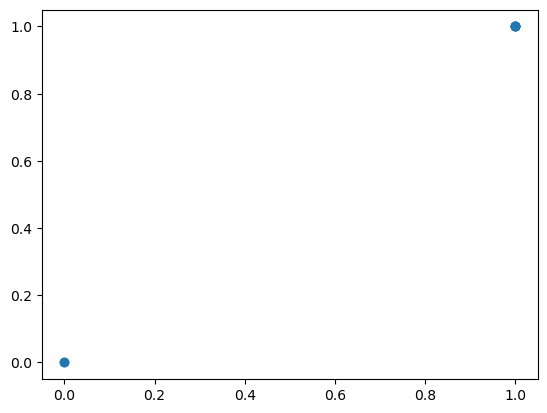

In [484]:
plt.scatter(y_test, predictions)


#### VISUALIZING THE DF WITHH A HISTOGRAM

(array([1., 0., 0., 1., 1., 0., 0., 1., 0., 3.]),
 array([-3.87745071e-16, -3.04561643e-16, -2.21378215e-16, -1.38194787e-16,
        -5.50113588e-17,  2.81720693e-17,  1.11355497e-16,  1.94538926e-16,
         2.77722354e-16,  3.60905782e-16,  4.44089210e-16]),
 <BarContainer object of 10 artists>)

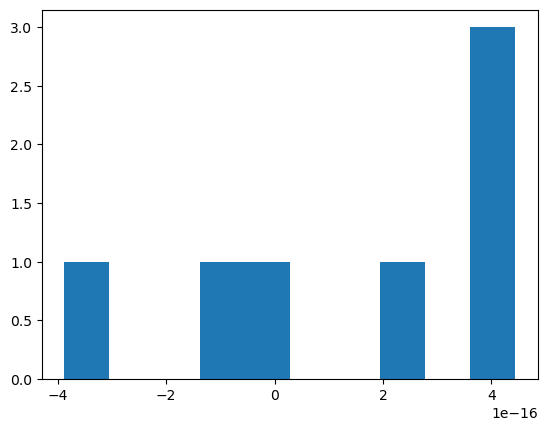

In [465]:
plt.hist(y_test - predictions)


#### TESTING THE PERORMANCE O THE MODEL

In [467]:
results = metrics.mean_absolute_error(y_test, predictions)
print("The Mean Absolute Error is: ", results)


The Mean Absolute Error is:  2.8846677352974705e-16


In [470]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print("Root Mean Sqaure Error is: ", RMSE)

Root Mean Sqaure Error is:  3.374816665351123e-16
